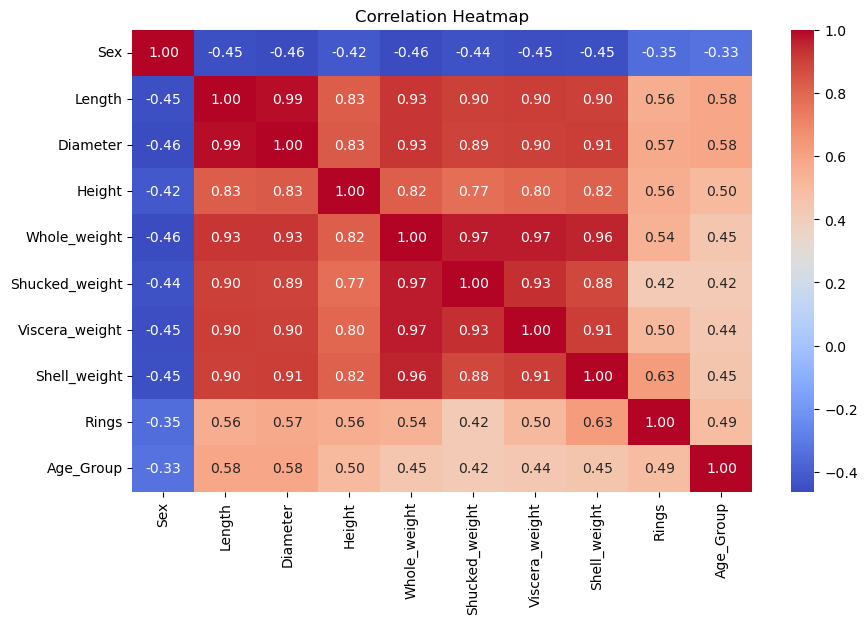

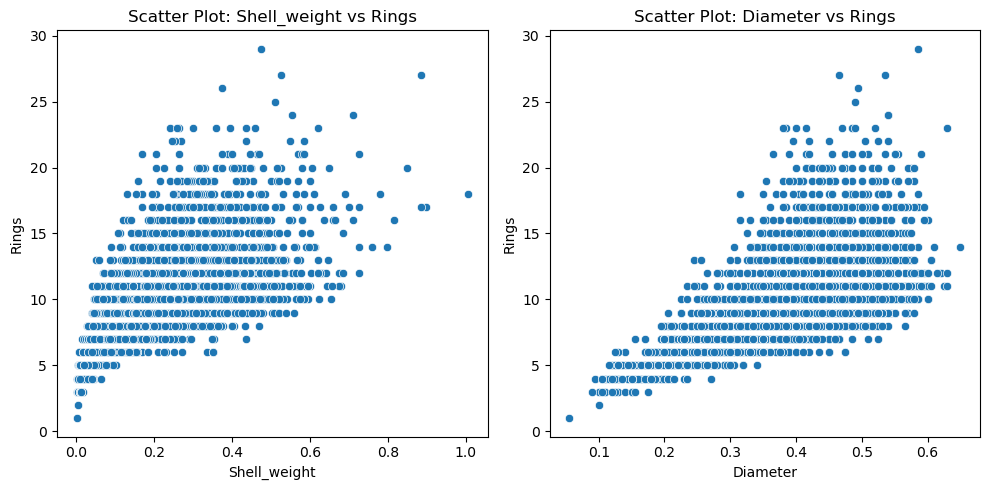

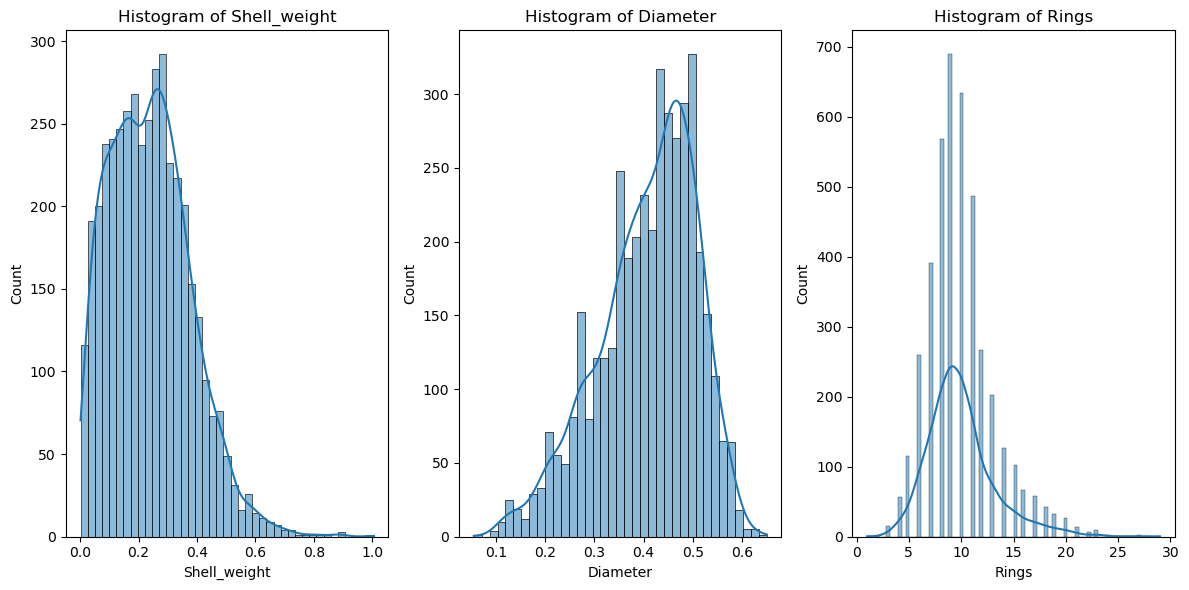

Training set size: 2506
Testing set size: 1671


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('abalone_data.csv')

# 清理数据，将'M', 'F', 'I' 转换为数值
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# 创建分类目标，将环龄小于7设为0，大于等于7设为1
df['Age_Group'] = (df['Rings'] >= 7).astype(int)

# 检查哪些列包含小于等于0的值并记录，但不检查 'Sex' 和 'Age_Group' 列
cols_le_0 = {}

for column in df.columns:
    if column not in ['Sex', 'Age_Group']:  # 排除 'Sex' 和 'Age_Group'
        count_le_0 = (df[column] <= 0).sum()
        if count_le_0 > 0:  # 如果这一列有小于等于 0 的异常值
            cols_le_0[column] = count_le_0

# 打印包含小于等于 0 值的列及其出现次数
# print("Columns with values <= 0 and their counts (excluding 'Sex' and 'Age_Group'):")
# for col, count in cols_le_0.items():
#     print(f"{col}: {count}")

# 删除包含空值的行
df_cleaned = df.dropna()

# 确保 y 和 X 保持同步
X = df_cleaned.drop(['Rings', 'Age_Group'], axis=1)
y = df_cleaned['Age_Group']

y = y.iloc[X.index]  # 确保 y 的索引与清理后的 X 一致

# 1. 相关性热图
plt.figure(figsize=(10, 6))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
# 存图（写report）
plt.show()

# 2. 两个最相关特征的散点图
# 找到与 Rings 最相关的特征
corr1 = correlation_matrix['Rings'].sort_values(ascending=False).index[1]
corr2 = correlation_matrix['Rings'].sort_values(ascending=False).index[2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_cleaned[corr1], y=df_cleaned['Rings'])
plt.title(f"Scatter Plot: {corr1} vs Rings")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_cleaned[corr2], y=df_cleaned['Rings'])
plt.title(f"Scatter Plot: {corr2} vs Rings")
plt.tight_layout()
plt.show()

# 3. 相关特征和 Rings 的直方图
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned[corr1], kde=True)
plt.title(f"Histogram of {corr1}")

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned[corr2], kde=True)
plt.title(f"Histogram of {corr2}")

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Rings'], kde=True)
plt.title("Histogram of Rings")
plt.tight_layout()
plt.show()

# 4. 创建 60/40 的训练/测试集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 输出训练集和测试集的大小
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Linear Regression - Train RMSE: 2.212054245066078, Test RMSE: 2.183379344624515
Linear Regression - Train R-squared: 0.5429807974750387, Test R-squared: 0.5182048268987614


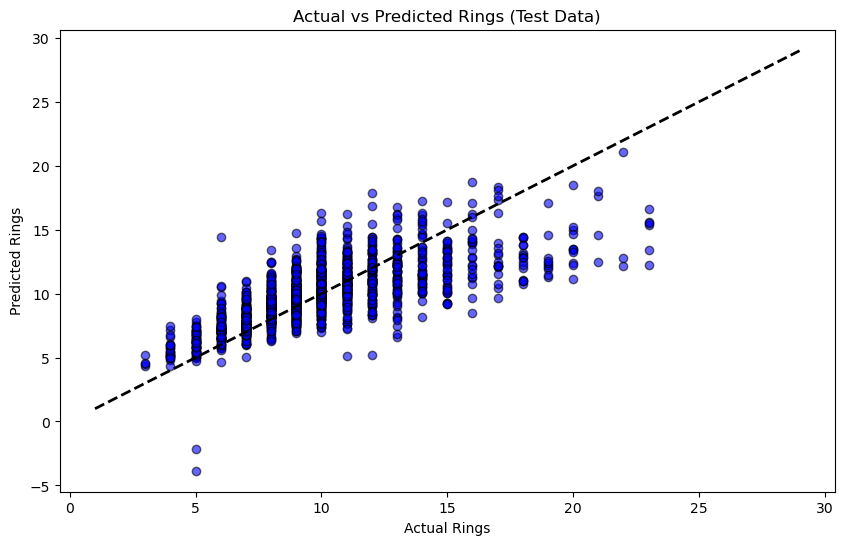

Mean Train RMSE: 2.1835, Std: 0.0322
Mean Test RMSE: 2.2348, Std: 0.0506
Mean Train R-squared: 0.5399, Std: 0.0113
Mean Test R-squared: 0.5205, Std: 0.0221


In [65]:
### 线性回归模型（基于 'Rings' 进行回归任务）

# 使用 'Rings' 作为回归目标
y_regression = df['Rings']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.4, random_state=42)

# 初始化线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

# 预测训练和测试数据
y_train_pred = linear_model.predict(X_train_reg)
y_test_pred = linear_model.predict(X_test_reg)

# 计算 RMSE 和 R-squared
rmse_train = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))

r2_train = r2_score(y_train_reg, y_train_pred)
r2_test = r2_score(y_test_reg, y_test_pred)

# 输出结果
print(f"Linear Regression - Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Linear Regression - Train R-squared: {r2_train}, Test R-squared: {r2_test}")

# 可视化：预测值与真实值的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_test_pred, color='blue', alpha=0.6, edgecolors='black')
plt.plot([y_regression.min(), y_regression.max()], [y_regression.min(), y_regression.max()], 'k--', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings (Test Data)')
plt.show()

# 初始化变量来存储 30 次实验的结果
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []

# 运行 30 次实验
for i in range(30):
    # 创建不同随机状态下的训练和测试集划分
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.4, random_state=i)
    
    # 初始化线性回归模型
    linear_model = LinearRegression()
    linear_model.fit(X_train_reg, y_train_reg)

    # 预测训练和测试数据
    y_train_pred = linear_model.predict(X_train_reg)
    y_test_pred = linear_model.predict(X_test_reg)

    # 计算 RMSE 和 R-squared
    rmse_train = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))
    r2_train = r2_score(y_train_reg, y_train_pred)
    r2_test = r2_score(y_test_reg, y_test_pred)

    # 将每次实验的结果添加到列表中
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

# 计算平均值和标准差
mean_rmse_train = np.mean(rmse_train_list)
std_rmse_train = np.std(rmse_train_list)
mean_rmse_test = np.mean(rmse_test_list)
std_rmse_test = np.std(rmse_test_list)

mean_r2_train = np.mean(r2_train_list)
std_r2_train = np.std(r2_train_list)
mean_r2_test = np.mean(r2_test_list)
std_r2_test = np.std(r2_test_list)

# 输出平均值和标准差
print(f"Mean Train RMSE: {mean_rmse_train:.4f}, Std: {std_rmse_train:.4f}")
print(f"Mean Test RMSE: {mean_rmse_test:.4f}, Std: {std_rmse_test:.4f}")
print(f"Mean Train R-squared: {mean_r2_train:.4f}, Std: {std_r2_train:.4f}")
print(f"Mean Test R-squared: {mean_r2_test:.4f}, Std: {std_r2_test:.4f}")


Accuracy: 0.9317773788150808
AUC Score: 0.9508184961478314


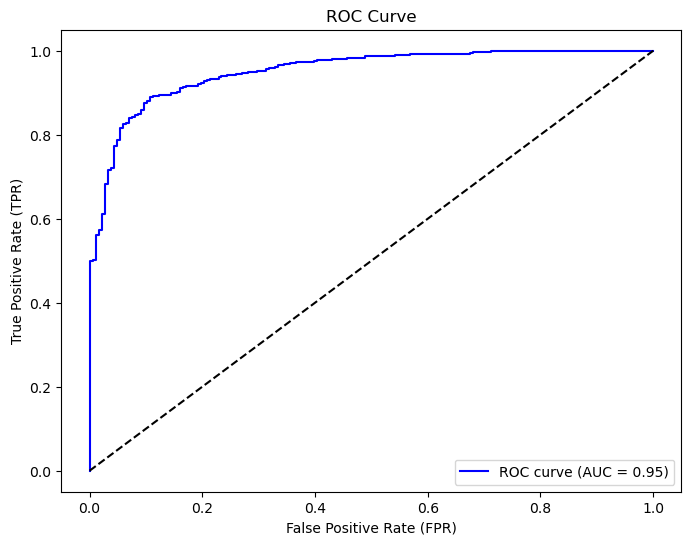

Mean Train Accuracy: 0.9348, Std: 0.0026
Mean Test Accuracy: 0.9351, Std: 0.0039
Mean Train AUC Score: 0.9530, Std: 0.0033
Mean Test AUC Score: 0.9528, Std: 0.0054


In [66]:
### 逻辑回归模型（分类任务：环龄小于7和大于等于7）

# 训练逻辑回归模型
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 预测分类结果
y_test_pred = log_model.predict(X_test)
y_test_prob = log_model.predict_proba(X_test)[:, 1]  # 类别1的概率

# 准确度分数
acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {acc}")

# AUC 分数
auc = roc_auc_score(y_test, y_test_prob)
print(f"AUC Score: {auc}")

# ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # 对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 初始化变量来存储 30 次实验的结果
train_acc_list = []
test_acc_list = []
train_auc_list = []
test_auc_list = []

# 运行 30 次实验
for i in range(30):
    # 创建不同随机状态下的训练和测试集划分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

    # 初始化逻辑回归模型
    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)

    # 预测训练和测试数据
    y_train_pred = log_model.predict(X_train)
    y_test_pred = log_model.predict(X_test)

    y_train_prob = log_model.predict_proba(X_train)[:, 1]
    y_test_prob = log_model.predict_proba(X_test)[:, 1]

    # 计算 Accuracy 和 AUC Score
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    # 将每次实验的结果添加到列表中
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    train_auc_list.append(train_auc)
    test_auc_list.append(test_auc)

# 计算平均值和标准差
mean_train_acc = np.mean(train_acc_list)
std_train_acc = np.std(train_acc_list)
mean_test_acc = np.mean(test_acc_list)
std_test_acc = np.std(test_acc_list)

mean_train_auc = np.mean(train_auc_list)
std_train_auc = np.std(train_auc_list)
mean_test_auc = np.mean(test_auc_list)
std_test_auc = np.std(test_auc_list)

# 输出平均值和标准差
print(f"Mean Train Accuracy: {mean_train_acc:.4f}, Std: {std_train_acc:.4f}")
print(f"Mean Test Accuracy: {mean_test_acc:.4f}, Std: {std_test_acc:.4f}")
print(f"Mean Train AUC Score: {mean_train_auc:.4f}, Std: {std_train_auc:.4f}")
print(f"Mean Test AUC Score: {mean_test_auc:.4f}, Std: {std_test_auc:.4f}")


### Normalization

In [67]:
from sklearn.preprocessing import MinMaxScaler

# 定义函数来计算和报告线性回归模型的 RMSE 和 R²（没有归一化）
def linear_regression_without_normalization(X_train_reg, X_test_reg, y_train_reg, y_test_reg):
    # Train linear regression model without normalization
    lin_reg = LinearRegression()

    # Train the linear regression model
    lin_reg.fit(X_train_reg, y_train_reg)

    # Predict
    y_train_reg_pred = lin_reg.predict(X_train_reg)
    y_test_reg_pred = lin_reg.predict(X_test_reg)

    # Calculate RMSE and R² (without normalization)
    train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_reg_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_reg_pred))
    train_r2 = r2_score(y_train_reg, y_train_reg_pred)
    test_r2 = r2_score(y_test_reg, y_test_reg_pred)

    return train_rmse, test_rmse, train_r2, test_r2

# 定义函数来计算和报告线性回归模型的 RMSE 和 R²（使用 MinMax 归一化）
def linear_regression_with_normalization(X_train_reg, X_test_reg, y_train_reg, y_test_reg):
    # Now apply MinMaxScaler to normalize the data
    scaler = MinMaxScaler()
    X_train_reg_scaled = scaler.fit_transform(X_train_reg)
    X_test_reg_scaled = scaler.transform(X_test_reg)

    # Train linear regression model with MinMax normalization
    lin_reg_scaled = LinearRegression()
    lin_reg_scaled.fit(X_train_reg_scaled, y_train_reg)

    # Predict with scaled data
    y_train_reg_scaled_pred = lin_reg_scaled.predict(X_train_reg_scaled)
    y_test_reg_scaled_pred = lin_reg_scaled.predict(X_test_reg_scaled)

    # Calculate RMSE and R² (with MinMax normalization)
    train_rmse_scaled = np.sqrt(mean_squared_error(y_train_reg, y_train_reg_scaled_pred))
    test_rmse_scaled = np.sqrt(mean_squared_error(y_test_reg, y_test_reg_scaled_pred))
    train_r2_scaled = r2_score(y_train_reg, y_train_reg_scaled_pred)
    test_r2_scaled = r2_score(y_test_reg, y_test_reg_scaled_pred)

    return train_rmse_scaled, test_rmse_scaled, train_r2_scaled, test_r2_scaled

# 运行 30 次实验，并计算没有归一化的 RMSE 和 R² 的平均值和标准差
def run_experiments(X, y_regression, n_experiments=30):
    train_rmse_list_without_norm = []
    test_rmse_list_without_norm = []
    train_r2_list_without_norm = []
    test_r2_list_without_norm = []

    train_rmse_list_with_norm = []
    test_rmse_list_with_norm = []
    train_r2_list_with_norm = []
    test_r2_list_with_norm = []

    for i in range(n_experiments):
        # 创建不同随机状态下的训练和测试集划分
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.4, random_state=i)

        # 计算没有归一化的 RMSE 和 R²
        train_rmse, test_rmse, train_r2, test_r2 = linear_regression_without_normalization(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
        train_rmse_list_without_norm.append(train_rmse)
        test_rmse_list_without_norm.append(test_rmse)
        train_r2_list_without_norm.append(train_r2)
        test_r2_list_without_norm.append(test_r2)

        # 计算使用 MinMaxScaler 归一化的 RMSE 和 R²
        train_rmse_scaled, test_rmse_scaled, train_r2_scaled, test_r2_scaled = linear_regression_with_normalization(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
        train_rmse_list_with_norm.append(train_rmse_scaled)
        test_rmse_list_with_norm.append(test_rmse_scaled)
        train_r2_list_with_norm.append(train_r2_scaled)
        test_r2_list_with_norm.append(test_r2_scaled)

    # 计算没有归一化的平均值和标准差
    mean_train_rmse_without_norm = np.mean(train_rmse_list_without_norm)
    std_train_rmse_without_norm = np.std(train_rmse_list_without_norm)
    mean_test_rmse_without_norm = np.mean(test_rmse_list_without_norm)
    std_test_rmse_without_norm = np.std(test_rmse_list_without_norm)

    mean_train_r2_without_norm = np.mean(train_r2_list_without_norm)
    std_train_r2_without_norm = np.std(train_r2_list_without_norm)
    mean_test_r2_without_norm = np.mean(test_r2_list_without_norm)
    std_test_r2_without_norm = np.std(test_r2_list_without_norm)

    # 输出没有归一化的结果
    print(f"Without Normalization - Mean Train RMSE: {mean_train_rmse_without_norm:.4f}, Std: {std_train_rmse_without_norm:.4f}")
    print(f"Without Normalization - Mean Test RMSE: {mean_test_rmse_without_norm:.4f}, Std: {std_test_rmse_without_norm:.4f}")
    print(f"Without Normalization - Mean Train R²: {mean_train_r2_without_norm:.4f}, Std: {std_train_r2_without_norm:.4f}")
    print(f"Without Normalization - Mean Test R²: {mean_test_r2_without_norm:.4f}, Std: {std_test_r2_without_norm:.4f}")

    # 计算归一化的平均值和标准差
    mean_train_rmse_with_norm = np.mean(train_rmse_list_with_norm)
    std_train_rmse_with_norm = np.std(train_rmse_list_with_norm)
    mean_test_rmse_with_norm = np.mean(test_rmse_list_with_norm)
    std_test_rmse_with_norm = np.std(test_rmse_list_with_norm)

    mean_train_r2_with_norm = np.mean(train_r2_list_with_norm)
    std_train_r2_with_norm = np.std(train_r2_list_with_norm)
    mean_test_r2_with_norm = np.mean(test_r2_list_with_norm)
    std_test_r2_with_norm = np.std(test_r2_list_with_norm)

    # 输出归一化的结果
    print(f"With MinMax Normalization - Mean Train RMSE: {mean_train_rmse_with_norm:.4f}, Std: {std_train_rmse_with_norm:.4f}")
    print(f"With MinMax Normalization - Mean Test RMSE: {mean_test_rmse_with_norm:.4f}, Std: {std_test_rmse_with_norm:.4f}")
    print(f"With MinMax Normalization - Mean Train R²: {mean_train_r2_with_norm:.4f}, Std: {std_train_r2_with_norm:.4f}")
    print(f"With MinMax Normalization - Mean Test R²: {mean_test_r2_with_norm:.4f}, Std: {std_test_r2_with_norm:.4f}")

train_rmse, test_rmse, train_r2, test_r2=linear_regression_without_normalization(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
print(f"Train RMSE (without normalization): {train_rmse}, R²: {train_r2}")
print(f"Test RMSE (without normalization): {test_rmse}, R²: {test_r2}")

train_rmse_scaled, test_rmse_scaled, train_r2_scaled, test_r2_scaled=linear_regression_with_normalization(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
print(f"Train RMSE (with MinMax normalization): {train_rmse_scaled}, R²: {train_r2_scaled}")
print(f"Test RMSE (with MinMax normalization): {test_rmse_scaled}, R²: {test_r2_scaled}")

# 执行实验
run_experiments(X, y_regression, n_experiments=30)


Train RMSE (without normalization): 2.218450183215769, R²: 0.5344691238325847
Test RMSE (without normalization): 2.175184382527955, R²: 0.5324855974083704
Train RMSE (with MinMax normalization): 2.218450183215769, R²: 0.5344691238325847
Test RMSE (with MinMax normalization): 2.1751843825279535, R²: 0.532485597408371
Without Normalization - Mean Train RMSE: 2.1835, Std: 0.0322
Without Normalization - Mean Test RMSE: 2.2348, Std: 0.0506
Without Normalization - Mean Train R²: 0.5399, Std: 0.0113
Without Normalization - Mean Test R²: 0.5205, Std: 0.0221
With MinMax Normalization - Mean Train RMSE: 2.1835, Std: 0.0322
With MinMax Normalization - Mean Test RMSE: 2.2348, Std: 0.0506
With MinMax Normalization - Mean Train R²: 0.5399, Std: 0.0113
With MinMax Normalization - Mean Test R²: 0.5205, Std: 0.0221


In [68]:
# 定义函数来计算并报告逻辑回归的 Accuracy（没有归一化）
def logistic_regression_without_normalization(X_train, X_test, y_train, y_test):
    # Train logistic regression model without normalization
    log_model = LogisticRegression(max_iter=10000)
    log_model.fit(X_train, y_train)

    # Predict on test data
    y_log_train_pred = log_model.predict(X_train)
    y_log_test_pred = log_model.predict(X_test)

    # Calculate Accuracy
    acc_train = accuracy_score(y_train, y_log_train_pred)
    acc_test = accuracy_score(y_test, y_log_test_pred)

    return acc_train, acc_test

# 定义函数来计算并报告逻辑回归的 Accuracy（使用 MinMax 归一化）
def logistic_regression_with_normalization(X_train, X_test, y_train, y_test):
    # Now apply MinMaxScaler to normalize the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic regression with MinMax normalization
    log_model_scaled = LogisticRegression(max_iter=10000)
    log_model_scaled.fit(X_train_scaled, y_train)

    # Predictions with normalized data
    y_log_scaled_train_pred = log_model_scaled.predict(X_train_scaled)
    y_log_scaled_test_pred = log_model_scaled.predict(X_test_scaled)

    # Calculate Accuracy
    acc_train_scaled = accuracy_score(y_train, y_log_scaled_train_pred)
    acc_test_scaled = accuracy_score(y_test, y_log_scaled_test_pred)

    return acc_train_scaled, acc_test_scaled

# 运行 30 次实验，并计算 Accuracy 的平均值和标准差
def run_logistic_experiments(X, y, n_experiments=30):
    acc_train_list_without_norm = []
    acc_test_list_without_norm = []

    acc_train_list_with_norm = []
    acc_test_list_with_norm = []

    for i in range(n_experiments):
        # 创建不同随机状态下的训练和测试集划分
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

        # 计算没有归一化的 Accuracy
        acc_train, acc_test = logistic_regression_without_normalization(X_train, X_test, y_train, y_test)
        acc_train_list_without_norm.append(acc_train)
        acc_test_list_without_norm.append(acc_test)

        # 计算使用 MinMaxScaler 归一化的 Accuracy
        acc_train_scaled, acc_test_scaled = logistic_regression_with_normalization(X_train, X_test, y_train, y_test)
        acc_train_list_with_norm.append(acc_train_scaled)
        acc_test_list_with_norm.append(acc_test_scaled)

    # 计算没有归一化的平均值和标准差
    mean_acc_train_without_norm = np.mean(acc_train_list_without_norm)
    std_acc_train_without_norm = np.std(acc_train_list_without_norm)
    mean_acc_test_without_norm = np.mean(acc_test_list_without_norm)
    std_acc_test_without_norm = np.std(acc_test_list_without_norm)

    # 输出没有归一化的结果
    print(f"Without Normalization - Mean Train Accuracy: {mean_acc_train_without_norm:.4f}, Std: {std_acc_train_without_norm:.4f}")
    print(f"Without Normalization - Mean Test Accuracy: {mean_acc_test_without_norm:.4f}, Std: {std_acc_test_without_norm:.4f}")

    # 计算归一化的平均值和标准差
    mean_acc_train_with_norm = np.mean(acc_train_list_with_norm)
    std_acc_train_with_norm = np.std(acc_train_list_with_norm)
    mean_acc_test_with_norm = np.mean(acc_test_list_with_norm)
    std_acc_test_with_norm = np.std(acc_test_list_with_norm)

    # 输出归一化的结果
    print(f"With MinMax Normalization - Mean Train Accuracy: {mean_acc_train_with_norm:.4f}, Std: {std_acc_train_with_norm:.4f}")
    print(f"With MinMax Normalization - Mean Test Accuracy: {mean_acc_test_with_norm:.4f}, Std: {std_acc_test_with_norm:.4f}")

acc_train, acc_test=logistic_regression_without_normalization(X_train, X_test, y_train, y_test)
print(f"Train Accuracy (without normalization): {acc_train}")
print(f"Test Accuracy (without normalization): {acc_test}")

acc_train_scaled, acc_test_scaled=logistic_regression_with_normalization(X_train, X_test, y_train, y_test)
print(f"Train Accuracy (with MinMax normalization): {acc_train_scaled}")
print(f"Test Accuracy (with MinMax normalization): {acc_test_scaled}")

# 执行实验
run_logistic_experiments(X, y, n_experiments=30)


Train Accuracy (without normalization): 0.9317637669592976
Test Accuracy (without normalization): 0.9389587073608617
Train Accuracy (with MinMax normalization): 0.9325618515562649
Test Accuracy (with MinMax normalization): 0.9371633752244165
Without Normalization - Mean Train Accuracy: 0.9348, Std: 0.0026
Without Normalization - Mean Test Accuracy: 0.9351, Std: 0.0039
With MinMax Normalization - Mean Train Accuracy: 0.9356, Std: 0.0030
With MinMax Normalization - Mean Test Accuracy: 0.9367, Std: 0.0043


### 只选两个feature

In [69]:
# 定义线性回归函数，基于选定的两个特征
def linear_regression_selected_features(X_train_reg, X_test_reg, y_train_reg, y_test_reg):
    linear_model_selected = LinearRegression()
    linear_model_selected.fit(X_train_reg, y_train_reg)

    # 预测训练和测试数据
    y_selected_train_pred = linear_model_selected.predict(X_train_reg)
    y_selected_test_pred = linear_model_selected.predict(X_test_reg)

    # 计算 RMSE 和 R-squared
    rmse_selected_train = np.sqrt(mean_squared_error(y_train_reg, y_selected_train_pred))
    rmse_selected_test = np.sqrt(mean_squared_error(y_test_reg, y_selected_test_pred))
    r2_selected_train = r2_score(y_train_reg, y_selected_train_pred)
    r2_selected_test = r2_score(y_test_reg, y_selected_test_pred)

    return rmse_selected_train, rmse_selected_test, r2_selected_train, r2_selected_test
# 进行30次实验，并输出RMSE和R²的平均值和标准差
def run_linear_regression_experiments(X, y, selected_features, n_experiments=30):
    rmse_train_list = []
    rmse_test_list = []
    r2_train_list = []
    r2_test_list = []

    for i in range(n_experiments):
        # 创建不同随机状态下的训练和测试集划分
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)
        
        # 选择两个最相关的特征
        X_selected_train = X_train[selected_features]
        X_selected_test = X_test[selected_features]

        # 运行线性回归实验
        rmse_train, rmse_test, r2_train, r2_test = linear_regression_selected_features(X_selected_train, X_selected_test, y_train, y_test)
        rmse_train_list.append(rmse_train)
        rmse_test_list.append(rmse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)

    # 计算RMSE和R²的平均值和标准差
    mean_rmse_train = np.mean(rmse_train_list)
    std_rmse_train = np.std(rmse_train_list)
    mean_rmse_test = np.mean(rmse_test_list)
    std_rmse_test = np.std(rmse_test_list)

    mean_r2_train = np.mean(r2_train_list)
    std_r2_train = np.std(r2_train_list)
    mean_r2_test = np.mean(r2_test_list)
    std_r2_test = np.std(r2_test_list)

    # 输出结果
    print(f"Linear Regression (selected features) - Mean Train RMSE: {mean_rmse_train:.4f}, Std: {std_rmse_train:.4f}")
    print(f"Linear Regression (selected features) - Mean Test RMSE: {mean_rmse_test:.4f}, Std: {std_rmse_test:.4f}")
    print(f"Linear Regression (selected features) - Mean Train R²: {mean_r2_train:.4f}, Std: {std_r2_train:.4f}")
    print(f"Linear Regression (selected features) - Mean Test R²: {mean_r2_test:.4f}, Std: {std_r2_test:.4f}")

# 定义逻辑回归函数，基于选定的两个特征
def logistic_regression_selected_features(X_train, X_test, y_train, y_test):
    log_model_selected = LogisticRegression(max_iter=10000)
    log_model_selected.fit(X_train, y_train)

    # 预测分类结果
    y_log_selected_train_pred = log_model_selected.predict(X_train)
    y_log_selected_test_pred = log_model_selected.predict(X_test)

    # 计算 Accuracy
    acc_selected_train = accuracy_score(y_train, y_log_selected_train_pred)
    acc_selected_test = accuracy_score(y_test, y_log_selected_test_pred)

    return acc_selected_train, acc_selected_test
def run_logistic_regression_experiments(X, y, selected_features, n_experiments=30):
    acc_train_list = []
    acc_test_list = []

    for i in range(n_experiments):
        # 创建不同随机状态下的训练和测试集划分
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)
        
        # 选择两个最相关的特征
        X_selected_train = X_train[selected_features]
        X_selected_test = X_test[selected_features]

        # 运行逻辑回归实验
        acc_train, acc_test = logistic_regression_selected_features(X_selected_train, X_selected_test, y_train, y_test)
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)

    # 计算 Accuracy 的平均值和标准差
    mean_acc_train = np.mean(acc_train_list)
    std_acc_train = np.std(acc_train_list)
    mean_acc_test = np.mean(acc_test_list)
    std_acc_test = np.std(acc_test_list)

    # 输出结果
    print(f"Logistic Regression (selected features) - Mean Train Accuracy: {mean_acc_train:.4f}, Std: {std_acc_train:.4f}")
    print(f"Logistic Regression (selected features) - Mean Test Accuracy: {mean_acc_test:.4f}, Std: {std_acc_test:.4f}")

selected_features = [corr1,corr2]

rmse_selected_train, rmse_selected_test, r2_selected_train, r2_selected_test=linear_regression_selected_features(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
print(f"Train RMSE (selected features): {rmse_selected_train}")
print(f"Test RMSE (selected features): {rmse_selected_test}")
print(f"Train R² (selected features): {r2_selected_train}")
print(f"Test R² (selected features): {r2_selected_test}")
acc_selected_train, acc_selected_test=logistic_regression_selected_features(X_train, X_test, y_train, y_test)
print(f"Train Accuracy (selected features): {acc_selected_train}")
print(f"Test Accuracy (selected features): {acc_selected_test}")
run_linear_regression_experiments(X, y_regression, selected_features, n_experiments=30)
run_logistic_regression_experiments(X, y, selected_features, n_experiments=30)


Train RMSE (selected features): 2.218450183215769
Test RMSE (selected features): 2.175184382527955
Train R² (selected features): 0.5344691238325847
Test R² (selected features): 0.5324855974083704
Train Accuracy (selected features): 0.9317637669592976
Test Accuracy (selected features): 0.9389587073608617
Linear Regression (selected features) - Mean Train RMSE: 2.5021, Std: 0.0393
Linear Regression (selected features) - Mean Test RMSE: 2.5213, Std: 0.0595
Linear Regression (selected features) - Mean Train R²: 0.3959, Std: 0.0127
Linear Regression (selected features) - Mean Test R²: 0.3900, Std: 0.0191
Logistic Regression (selected features) - Mean Train Accuracy: 0.9312, Std: 0.0028
Logistic Regression (selected features) - Mean Test Accuracy: 0.9327, Std: 0.0054


Epoch [100/500], Train Loss: 4.9263
Epoch [200/500], Train Loss: 4.7374
Epoch [300/500], Train Loss: 4.6036
Epoch [400/500], Train Loss: 4.5142
Epoch [500/500], Train Loss: 4.4572
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
Neural Network (Linear Regression) Train RMSE: 2.1295
Neural Network (Linear Regression) Test RMSE: 2.1484
Neural Network (Linear Regression) Train R²: 0.5764
Neural Network (Linear Regression) Test R²: 0.5335
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/

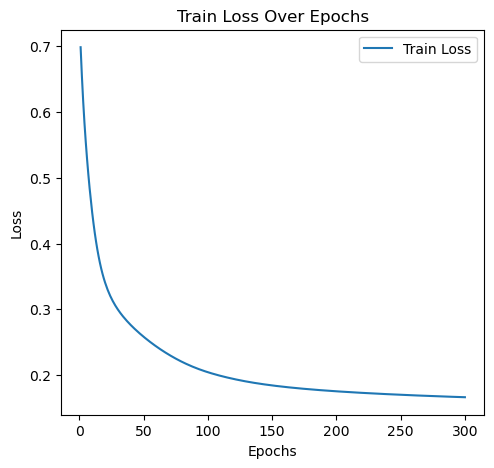

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
# 使用 'Rings' 作为回归目标
y_regression = df['Rings']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.4, random_state=42)

scaler = MinMaxScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# 1. Build the neural network model with Dropout layers
model_nn_reg = Sequential()
model_nn_reg.add(Input(shape=(X_train_reg_scaled.shape[1],)))
# model_nn_reg.add(Dense(128, activation='relu'))
# model_nn_reg.add(Dropout(0.3))  # Drop 30% of neurons in this layer
model_nn_reg.add(Dense(64, activation='relu'))
# model_nn_reg.add(Dropout(0.3))  # Drop 30% of neurons in this layer
model_nn_reg.add(Dense(32, activation='relu'))
model_nn_reg.add(Dense(1))  # Output layer

# 2. Compile the model
model_nn_reg.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

# Custom callback to print every 100th epoch's training and validation loss
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 100 == 0:
            train_loss = logs.get('loss')
#             val_loss = logs.get('val_loss')
#             print(f"Epoch [{epoch+1}/1000], Train Loss: {train_loss:.4f}, Test Loss: {val_loss:.4f}")
            print(f"Epoch [{epoch+1}/500], Train Loss: {train_loss:.4f}")

# 3. Train the model with the Custom Callback
history_reg = model_nn_reg.fit(
    X_train_reg_scaled, 
    y_train_reg, 
    epochs=500, 
    batch_size=32, 
    callbacks=[CustomCallback()],
    verbose=0  # Disable default training output
)


plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()

# 4. Make predictions and calculate RMSE and R²
y_nn_train_pred_reg = model_nn_reg.predict(X_train_reg_scaled)
y_nn_test_pred_reg = model_nn_reg.predict(X_test_reg_scaled)

# Calculate RMSE and R²
rmse_nn_train_reg = np.sqrt(mean_squared_error(y_train_reg, y_nn_train_pred_reg))
rmse_nn_test_reg = np.sqrt(mean_squared_error(y_test_reg, y_nn_test_pred_reg))
r2_train_reg = r2_score(y_train_reg, y_nn_train_pred_reg)
r2_test_reg = r2_score(y_test_reg, y_nn_test_pred_reg)

# Print final results
print(f"Neural Network (Linear Regression) Train RMSE: {rmse_nn_train_reg:.4f}")
print(f"Neural Network (Linear Regression) Test RMSE: {rmse_nn_test_reg:.4f}")
print(f"Neural Network (Linear Regression) Train R²: {r2_train_reg:.4f}")
print(f"Neural Network (Linear Regression) Test R²: {r2_test_reg:.4f}")





# Define lists to store results
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []

# Run 30 experiments
for i in range(30):
    # Split the data with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

    # 1. Build the neural network model with Dropout layers
    model_nn_reg = Sequential()
    model_nn_reg.add(Input(shape=(X_train.shape[1],)))
#     model_nn_reg.add(Dense(128, activation='relu'))
#     model_nn_reg.add(Dropout(0.3))
    model_nn_reg.add(Dense(64, activation='relu'))
#     model_nn_reg.add(Dropout(0.3))
    model_nn_reg.add(Dense(32, activation='relu'))
    model_nn_reg.add(Dense(1))

    # 2. Compile the model
    model_nn_reg.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

    # Train the model without custom callback for simplicity
    model_nn_reg.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

    # 3. Make predictions
    y_train_pred = model_nn_reg.predict(X_train_reg_scaled)
    y_test_pred = model_nn_reg.predict(X_test_reg_scaled)

    # Calculate RMSE and R²
    rmse_train_list.append(np.sqrt(mean_squared_error(y_train_reg, y_nn_train_pred_reg)))
    rmse_test_list.append(np.sqrt(mean_squared_error(y_test_reg, y_nn_test_pred_reg)))
    r2_train_list.append(r2_score(y_train_reg, y_nn_train_pred_reg))
    r2_test_list.append(r2_score(y_test_reg, y_nn_test_pred_reg))



# for i in range(3):
#     # Split the data with different random states
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)
    
#     # Normalize the data
#     scaler = MinMaxScaler()
#     X_train_reg_scaled = scaler.fit_transform(X_train)
#     X_test_reg_scaled = scaler.transform(X_test)

#     # 1. Build the neural network model
#     model_nn_reg = Sequential()
#     model_nn_reg.add(Input(shape=(X_train_reg_scaled.shape[1],)))
#     model_nn_reg.add(Dense(128, activation='relu'))
#     model_nn_reg.add(Dense(64, activation='relu'))
#     model_nn_reg.add(Dense(32, activation='relu'))
#     model_nn_reg.add(Dense(1))  # Output layer

#     # 2. Compile the model
#     model_nn_reg.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

#     # Train the model without custom callback for simplicity
#     model_nn_reg.fit(X_train_reg_scaled, y_train, epochs=1000, batch_size=32, verbose=0)

#     # 3. Make predictions
#     y_train_pred = model_nn_reg.predict(X_train_reg_scaled)
#     y_test_pred = model_nn_reg.predict(X_test_reg_scaled)

#     # Calculate RMSE and R²
#     rmse_train_list.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
#     rmse_test_list.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
#     r2_train_list.append(r2_score(y_train, y_train_pred))
#     r2_test_list.append(r2_score(y_test, y_test_pred))

# Calculate mean and standard deviation for each metric
mean_rmse_train = np.mean(rmse_train_list)
std_rmse_train = np.std(rmse_train_list)
mean_rmse_test = np.mean(rmse_test_list)
std_rmse_test = np.std(rmse_test_list)

mean_r2_train = np.mean(r2_train_list)
std_r2_train = np.std(r2_train_list)
mean_r2_test = np.mean(r2_test_list)
std_r2_test = np.std(r2_test_list)

# Print results
print(f"Mean Train RMSE: {mean_rmse_train:.4f}, Std: {std_rmse_train:.4f}")
print(f"Mean Test RMSE: {mean_rmse_test:.4f}, Std: {std_rmse_test:.4f}")
print(f"Mean Train R-squared: {mean_r2_train:.4f}, Std: {std_r2_train:.4f}")
print(f"Mean Test R-squared: {mean_r2_test:.4f}, Std: {std_r2_test:.4f}")

In [71]:
# # 1. Build the neural network model for classification
# model_nn_class = Sequential()
# model_nn_class.add(Input(shape=(X_train.shape[1],)))  # 直接使用原始特征
# # model_nn_class.add(Dense(128, activation='relu')) 
# model_nn_class.add(Dense(64, activation='relu')) 
# # model_nn_reg.add(Dropout(0.3)) 
# model_nn_class.add(Dense(32, activation='relu'))
# model_nn_class.add(Dense(1, activation='sigmoid'))

# # 2. Compile the model
# model_nn_class.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Custom callback to print metrics every 100 epochs
# class CustomCallback(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if (epoch + 1) % 100 == 0:
#             train_loss = logs.get('loss')
#             train_accuracy = logs.get('accuracy')
#             print(f"Epoch [{epoch+1}/1000], Train Loss: {train_loss:.4f}, "
#                   f"Train Accuracy: {train_accuracy:.4f}")

# # 3. Train the model on original data
# history_class = model_nn_class.fit(
#     X_train,  # 直接使用原始的 X_train
#     y_train, 
#     epochs=300, 
#     batch_size=32, 
# #     callbacks=[CustomCallback()],
#     verbose=0  # Disable default training output
# )

# plt.figure(figsize=(10, 6))

# # Plot training accuracy
# plt.plot(history_class.history['accuracy'], label='Train Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy Over Epochs')
# plt.legend()
# plt.show()

# # Plot training loss
# plt.plot(history_class.history['loss'], label='Train Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Neural Network Training Loss')
# plt.legend()
# plt.show()

# # 4. Predict and calculate accuracy on training and test data
# y_nn_train_pred_class = (model_nn_class.predict(X_train) > 0.5).astype(int)
# y_nn_test_pred_class = (model_nn_class.predict(X_test) > 0.5).astype(int)

# # Calculate accuracy
# acc_train_class = accuracy_score(y_train, y_nn_train_pred_class)
# acc_test_class = accuracy_score(y_test, y_nn_test_pred_class)

# # Print results
# print(f"Neural Network (Classification) Train Accuracy: {acc_train_class:.4f}")
# print(f"Neural Network (Classification) Test Accuracy: {acc_test_class:.4f}")

# # Lists to store accuracy results for 30 trials
# # acc_train_list = []
# # acc_test_list = []

# # # Run 30 experiments with different random states
# # for i in range(30):
# #     # Split the data with different random states
# #     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

# #     # Rebuild and recompile the model for each trial
# #     model_nn_class = Sequential()
# #     model_nn_class.add(Input(shape=(X_train.shape[1],)))
# #     model_nn_class.add(Dense(128, activation='relu'))
# #     model_nn_class.add(Dense(64, activation='relu'))
# #     model_nn_class.add(Dense(32, activation='relu'))
# #     model_nn_class.add(Dense(1, activation='sigmoid'))

# #     model_nn_class.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# #     # Train the model without custom callback for simplicity
# #     model_nn_class.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

# #     # Make predictions and calculate accuracy
# #     y_nn_train_pred_class = (model_nn_class.predict(X_train) > 0.5).astype(int)
# #     y_nn_test_pred_class = (model_nn_class.predict(X_test) > 0.5).astype(int)

# #     acc_train_list.append(accuracy_score(y_train, y_nn_train_pred_class))
# #     acc_test_list.append(accuracy_score(y_test, y_nn_test_pred_class))

# # # Calculate mean and standard deviation for accuracy
# # mean_acc_train = np.mean(acc_train_list)
# # std_acc_train = np.std(acc_train_list)
# # mean_acc_test = np.mean(acc_test_list)
# # std_acc_test = np.std(acc_test_list)

# # # Print results for 30 trials
# # print(f"Mean Train Accuracy (30 Trials): {mean_acc_train:.4f}, Std: {std_acc_train:.4f}")
# # print(f"Mean Test Accuracy (30 Trials): {mean_acc_test:.4f}, Std: {std_acc_test:.4f}")


Epoch [1/300], Train Loss: 0.6980, Train Accuracy: 0.4665
Epoch [2/300], Train Loss: 0.6537, Train Accuracy: 0.8903
Epoch [3/300], Train Loss: 0.6157, Train Accuracy: 0.8962
Epoch [4/300], Train Loss: 0.5828, Train Accuracy: 0.8962
Epoch [5/300], Train Loss: 0.5542, Train Accuracy: 0.8962
Epoch [6/300], Train Loss: 0.5285, Train Accuracy: 0.8962
Epoch [7/300], Train Loss: 0.5051, Train Accuracy: 0.8962
Epoch [8/300], Train Loss: 0.4839, Train Accuracy: 0.8962
Epoch [9/300], Train Loss: 0.4647, Train Accuracy: 0.8962
Epoch [10/300], Train Loss: 0.4470, Train Accuracy: 0.8962
Epoch [11/300], Train Loss: 0.4309, Train Accuracy: 0.8962
Epoch [12/300], Train Loss: 0.4162, Train Accuracy: 0.8962
Epoch [13/300], Train Loss: 0.4030, Train Accuracy: 0.8962
Epoch [14/300], Train Loss: 0.3911, Train Accuracy: 0.8962
Epoch [15/300], Train Loss: 0.3804, Train Accuracy: 0.8962
Epoch [16/300], Train Loss: 0.3708, Train Accuracy: 0.8962
Epoch [17/300], Train Loss: 0.3621, Train Accuracy: 0.8962
Epoch 

Epoch [140/300], Train Loss: 0.1873, Train Accuracy: 0.9190
Epoch [141/300], Train Loss: 0.1870, Train Accuracy: 0.9198
Epoch [142/300], Train Loss: 0.1867, Train Accuracy: 0.9202
Epoch [143/300], Train Loss: 0.1864, Train Accuracy: 0.9202
Epoch [144/300], Train Loss: 0.1861, Train Accuracy: 0.9202
Epoch [145/300], Train Loss: 0.1859, Train Accuracy: 0.9210
Epoch [146/300], Train Loss: 0.1856, Train Accuracy: 0.9210
Epoch [147/300], Train Loss: 0.1853, Train Accuracy: 0.9214
Epoch [148/300], Train Loss: 0.1851, Train Accuracy: 0.9218
Epoch [149/300], Train Loss: 0.1848, Train Accuracy: 0.9226
Epoch [150/300], Train Loss: 0.1846, Train Accuracy: 0.9230
Epoch [151/300], Train Loss: 0.1843, Train Accuracy: 0.9226
Epoch [152/300], Train Loss: 0.1841, Train Accuracy: 0.9226
Epoch [153/300], Train Loss: 0.1838, Train Accuracy: 0.9238
Epoch [154/300], Train Loss: 0.1836, Train Accuracy: 0.9242
Epoch [155/300], Train Loss: 0.1834, Train Accuracy: 0.9246
Epoch [156/300], Train Loss: 0.1831, Tra

Epoch [280/300], Train Loss: 0.1680, Train Accuracy: 0.9346
Epoch [281/300], Train Loss: 0.1679, Train Accuracy: 0.9346
Epoch [282/300], Train Loss: 0.1679, Train Accuracy: 0.9346
Epoch [283/300], Train Loss: 0.1678, Train Accuracy: 0.9334
Epoch [284/300], Train Loss: 0.1677, Train Accuracy: 0.9334
Epoch [285/300], Train Loss: 0.1677, Train Accuracy: 0.9330
Epoch [286/300], Train Loss: 0.1676, Train Accuracy: 0.9330
Epoch [287/300], Train Loss: 0.1675, Train Accuracy: 0.9322
Epoch [288/300], Train Loss: 0.1675, Train Accuracy: 0.9322
Epoch [289/300], Train Loss: 0.1674, Train Accuracy: 0.9322
Epoch [290/300], Train Loss: 0.1673, Train Accuracy: 0.9322
Epoch [291/300], Train Loss: 0.1672, Train Accuracy: 0.9322
Epoch [292/300], Train Loss: 0.1672, Train Accuracy: 0.9322
Epoch [293/300], Train Loss: 0.1671, Train Accuracy: 0.9322
Epoch [294/300], Train Loss: 0.1670, Train Accuracy: 0.9322
Epoch [295/300], Train Loss: 0.1670, Train Accuracy: 0.9322
Epoch [296/300], Train Loss: 0.1669, Tra

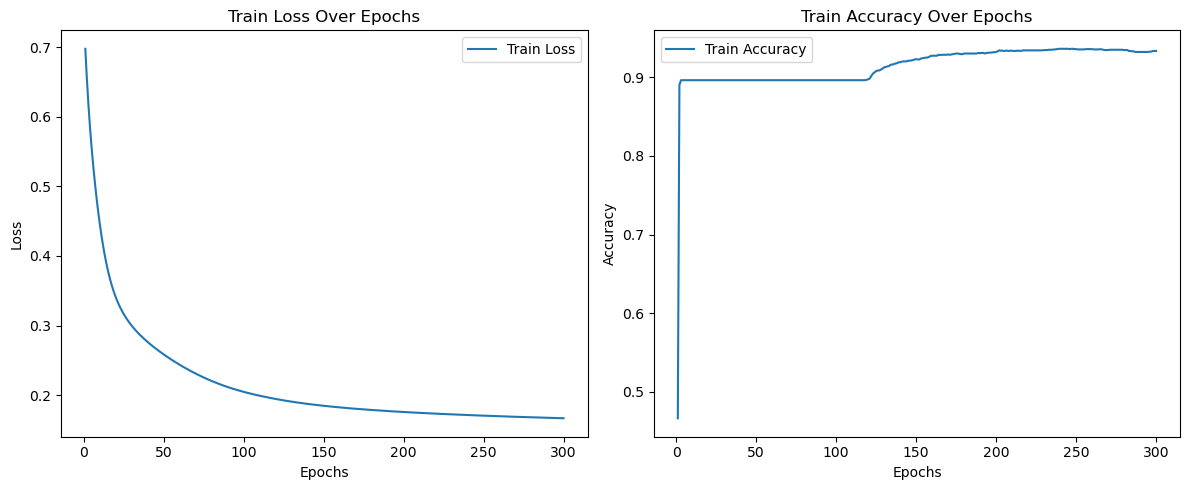

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 构建神经网络模型
model_nn_class = Sequential()
model_nn_class.add(Input(shape=(X_train.shape[1],)))  # 使用原始数据，不再缩放
model_nn_class.add(Dense(64, activation='relu'))
model_nn_class.add(Dense(32, activation='relu'))
model_nn_class.add(Dense(1, activation='sigmoid'))

# 编译模型
model_nn_class.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 记录每个 epoch 的损失和准确率
epochs = 300  # 设置训练的 epoch 数
batch_size = 32
train_losses = []
train_accuracies = []

# 训练模型并在每个 epoch 后输出训练损失和准确率
for epoch in range(epochs):
    history = model_nn_class.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0)  # 每次训练1个 epoch

    # 获取训练损失和准确率
    train_loss = history.history['loss'][0]
    train_accuracy = history.history['accuracy'][0]

    # 保存损失和准确率
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # 输出每个 epoch 的结果
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# 测试模型并计算最终的准确率
y_nn_train_pred_class = (model_nn_class.predict(X_train) > 0.5).astype(int)
y_nn_test_pred_class = (model_nn_class.predict(X_test) > 0.5).astype(int)

acc_train_class = accuracy_score(y_train, y_nn_train_pred_class)
acc_test_class = accuracy_score(y_test, y_nn_test_pred_class)

# 输出最终的训练和测试准确率
print(f"Neural Network (Classification) Train Accuracy: {acc_train_class:.4f}")
print(f"Neural Network (Classification) Test Accuracy: {acc_test_class:.4f}")

# 绘制损失和准确率图表
plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()